    ---
    layout: post
    title: Introduction to Pandas 3
    excerpt:
    categories: blog
    tags: ["Python", "Data Science", "Pandas"]
    published: true
    comments: true
    share: true
    ---

Hello all, I am back with another of my notes on Pandas. Today our focus will be grouping, merging and reshaping our data with Pandas. Modifiying data is very fundamental when it comes to data analysis and other core subjects requiring data cleaning. 

## Grouping of Data

The ```groupby``` operation can be thought of as part of a process that involves the following 3 steps:

- Splitting the dataset
- Analyzing the data
- Aggregating or combining the data


The ```groupby``` won't really work with Series since they are 1D object. However can be performed to obtain distinct rows of the Series. 

Dataset we will use taken from [Chris Albon's Web Notes](http://chrisalbon.com/)

In [48]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df.head()

regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
4    Dragoons     1st     Cooze             3             70

Let's apply  ```groupby``` to the DataFrame and see what is the type of the result:

In [3]:
companyGrp = df.groupby('company')
type(companyGrp)

pandas.core.groupby.DataFrameGroupBy

In [4]:
# We can see the groups and the indexes accordingly
companyGrp.groups

{'1st': [0, 1, 4, 5, 8, 9], '2nd': [2, 3, 6, 7, 10, 11]}

In [5]:
# Returns the length of the number of groups
len(companyGrp.groups)

2

In [6]:
# Prints the full sizes of the elements of groups
companyGrp.size()

company
1st    6
2nd    6
dtype: int64

A multicolumn groupby specifies more than one column to be used as the key by
specifying the key columns as a list.

In [21]:
seasonData = pd.read_csv("./data/full_soccer.csv", header=None)
seasonData.columns = ["league", 'date', 'home', 'away', 'hgoal', 'agoal', 'result', 'season']
seasonData.head()

league      date           home        away  hgoal  agoal result season
0     D1  22/08/14  Bayern Munich   Wolfsburg      2      1      H  14-15
1     D1  23/08/14       Dortmund  Leverkusen      0      2      A  14-15
2     D1  23/08/14  Ein Frankfurt    Freiburg      1      0      H  14-15
3     D1  23/08/14        FC Koln     Hamburg      0      0      D  14-15
4     D1  23/08/14       Hannover  Schalke 04      2      1      H  14-15

In [22]:
seasonData = seasonData.set_index('date')
seasonData.head()

league           home        away  hgoal  agoal result season
date                                                                  
22/08/14     D1  Bayern Munich   Wolfsburg      2      1      H  14-15
23/08/14     D1       Dortmund  Leverkusen      0      2      A  14-15
23/08/14     D1  Ein Frankfurt    Freiburg      1      0      H  14-15
23/08/14     D1        FC Koln     Hamburg      0      0      D  14-15
23/08/14     D1       Hannover  Schalke 04      2      1      H  14-15

In [23]:
seasonDataGroupbyYear = seasonData.groupby(lambda date: date.split('/')[2])

We can then iterate over the resulting groupby object and display the groups. In the following command, we see the two sets of statistics grouped by year. Note the use of the lambda function to obtain the year group from the first day of the month.

In [24]:
for name, group in seasonDataGroupbyYear:
    print name
    print group

11
         league                home                away  hgoal  agoal result  \
date                                                                           
27/08/11    SP1             Granada               Betis      0      1      A   
27/08/11    SP1            Sp Gijon            Sociedad      1      2      A   
27/08/11    SP1            Valencia           Santander      4      3      H   
28/08/11    SP1          Ath Bilbao           Vallecano      1      1      D   
28/08/11    SP1          Ath Madrid             Osasuna      0      0      D   
28/08/11    SP1              Getafe             Levante      1      1      D   
28/08/11    SP1            Mallorca             Espanol      1      0      H   
28/08/11    SP1             Sevilla              Malaga      2      1      H   
28/08/11    SP1            Zaragoza         Real Madrid      0      6      A   
29/08/11    SP1           Barcelona          Villarreal      5      0      H   
10/09/11    SP1         Real Madrid  

If we wished to group by individual month instead, we would need to apply groupby with a level argument, as follows:

In [27]:
# Same day games
for name, group in (seasonData.groupby(level=0)):
    print name
    print group
    print "\n"

01/01/13
         league          home                away  hgoal  agoal result season
date                                                                         
01/01/13     E2     Brentford         Bournemouth      0      0      D  12-13
01/01/13     E2          Bury            Tranmere      0      1      A  12-13
01/01/13     E2      Coventry          Shrewsbury      0      1      A  12-13
01/01/13     E2  Crawley Town          Colchester      3      0      H  12-13
01/01/13     E2         Crewe            Carlisle      1      0      H  12-13
01/01/13     E2     Doncaster    Sheffield United      2      2      D  12-13
01/01/13     E2    Hartlepool             Preston      0      1      A  12-13
01/01/13     E2  Notts County  Milton Keynes Dons      1      2      A  12-13
01/01/13     E2    Scunthorpe              Oldham      2      2      D  12-13
01/01/13     E2       Swindon          Portsmouth      5      0      H  12-13
01/01/13     E2       Walsall           Stevenage      

Note that since in the preceding commands we're grouping on an index, we need to specify the level argument as opposed to just using a column name. When we group by multiple keys, the resulting group name is a tuple, as shown in the upcoming commands. First, we reset the index to obtain the original DataFrame and define a MultiIndex in order to be able to group by multiple keys. If this is not done, it will result in a ```ValueError``` :

In [28]:
seasonData = seasonData.reset_index()

In [29]:
seasonData = seasonData.set_index(['date', 'league'])

In [30]:
dateAndLeague = seasonData.groupby(level=['date', 'league'])

In [31]:
for name, group in dateAndLeague:
    print(name)
    print(group)

('01/01/13', 'E2')
                         home                away  hgoal  agoal result season
date     league                                                              
01/01/13 E2         Brentford         Bournemouth      0      0      D  12-13
         E2              Bury            Tranmere      0      1      A  12-13
         E2          Coventry          Shrewsbury      0      1      A  12-13
         E2      Crawley Town          Colchester      3      0      H  12-13
         E2             Crewe            Carlisle      1      0      H  12-13
         E2         Doncaster    Sheffield United      2      2      D  12-13
         E2        Hartlepool             Preston      0      1      A  12-13
         E2      Notts County  Milton Keynes Dons      1      2      A  12-13
         E2        Scunthorpe              Oldham      2      2      D  12-13
         E2           Swindon          Portsmouth      5      0      H  12-13
         E2           Walsall           Steve

In [32]:
seasonData.head(3)

home        away  hgoal  agoal result season
date     league                                                       
22/08/14 D1      Bayern Munich   Wolfsburg      2      1      H  14-15
23/08/14 D1           Dortmund  Leverkusen      0      2      A  14-15
         D1      Ein Frankfurt    Freiburg      1      0      H  14-15

Suppose we wish to compute the total number of goals scored by home team and away team in each date. We can achieve that by grouping the data by date column and calling sum() function on the that data.

In [36]:
grouped2Data = seasonData.groupby(level='date')
(grouped2Data.sum()).head()

hgoal  agoal
date                  
01/01/13     18      9
01/01/14     14     13
01/02/12     18      9
01/02/13     10     12
01/02/14     39     21

We can achieve the same results without creating a new data frame and by calling the level as sum function's parameter:

In [38]:
(seasonData.sum(level='date')).head()

hgoal  agoal
date                  
01/01/13     18      9
01/01/14     14     13
01/02/12     18      9
01/02/13     10     12
01/02/14     39     21

In [39]:
totalgoal = grouped2Data.sum()

In [50]:
# I just wanted to see the percentages of home-away goal number in given dates
totalgoal['hgoal']/totalgoal['agoal']

date
01/01/13    2.000000
01/01/14    1.076923
01/02/12    2.000000
01/02/13    0.833333
01/02/14    1.857143
01/02/15    1.809524
01/02/16    1.000000
01/03/13    1.500000
01/03/14    2.769231
01/03/15    0.727273
01/03/16    1.769231
01/04/12    1.631579
01/04/13    3.833333
01/04/14    2.000000
01/04/15    0.000000
01/04/16         inf
01/05/12    1.400000
01/05/15         inf
01/05/16    2.000000
01/06/13    1.533333
01/09/12    1.275862
01/09/13    1.344828
01/10/11    1.216216
01/10/12    1.000000
01/11/12    0.000000
01/11/13    4.500000
01/11/14    1.032258
01/11/15    1.500000
01/12/12    1.375000
01/12/13    1.714286
              ...   
30/10/12    1.000000
30/10/13    1.368421
30/10/14    1.000000
30/10/15    1.200000
30/11/12    1.750000
30/11/13    1.272727
30/11/14    1.411765
30/11/15    2.500000
30/12/11    3.000000
30/12/15    2.500000
31/01/12    0.666667
31/01/14    0.833333
31/01/15    1.129032
31/01/16    2.272727
31/03/12    0.850000
31/03/13    1.133333
31/03/14

In [70]:
# This has inf values inside so I need to change inf to 0
num_array = (totalgoal['hgoal'] / totalgoal['agoal']).values

In [77]:
# If inf and nan change to 0
num_array[num_array == np.inf] = 0
num_array = np.nan_to_num(num_array)

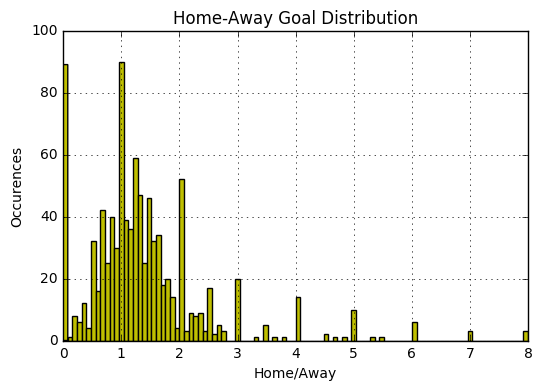

In [87]:
# the histogram of the data
plt.hist(num_array, bins=100, facecolor='y')

plt.xlabel('Home/Away')
plt.ylabel('Occurences')
plt.title('Home-Away Goal Distribution')
plt.axis([0.0, 8.0, 0, 100])
plt.grid(True)

plt.show()

## Merging and Joining

There are various functions that can be used to merge and join pandas' data structures, which include the following functions:

- ```concat```
- ```append```

### The ```concat``` function
